In [1]:
import wandb
#from wandb import Api
from collections import defaultdict
import pandas as pd
import numpy as np

import random

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display_html
import os

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [4]:
## DBMS; fit_test = 1; IMDb;
#RDIR = "../estimates/DBMS-lt_type6kgmc1vg"

## DBMS-all; fit_test = 1; IMDb;
RDIR = "../estimates/DBMS-All-IMDb-Single"

#RDIR = "../estimates/NN-IMDb-Single"

FNS = ["test_unseen-estimates.csv"]

Index(['Unnamed: 0', 'True', 'Ests', 'instance'], dtype='object')
../estimates/DBMS-All-IMDb-Single/test_unseen-estimates.csv


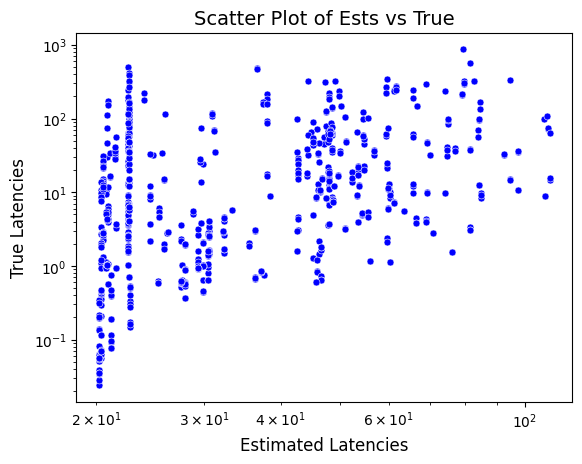

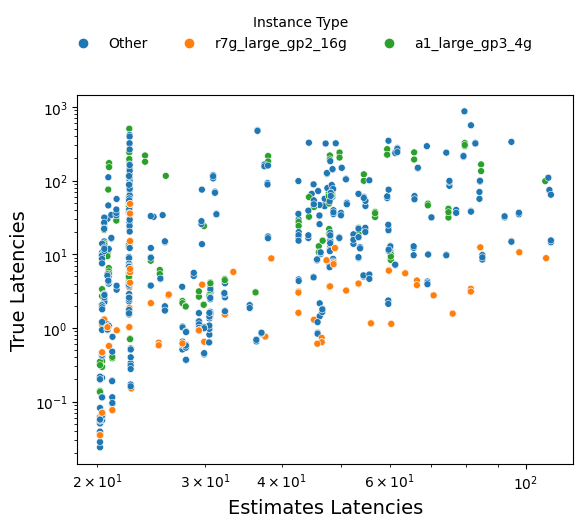

In [5]:
OUTNAME = RDIR + ".png"
OUTNAME2 = RDIR + "-hue" ".png"

def get_instance(x):
    if x["instance"] == 'r7g_large_gp2_16g':
        return 'r7g_large_gp2_16g'
    elif x["instance"] == "a1_large_gp3_4g":
        return 'a1_large_gp3_4g'
    else:
        return "Other"

for fn in FNS:
    fn = os.path.join(RDIR, fn)
    df = pd.read_csv(fn)
    print(df.keys())
    print(fn)
    df["Instance Type"] = df.apply(lambda x: get_instance(x) , axis=1)
    
    # Create the scatter plot
    sns.scatterplot(data=df, x="Ests", y="True", color='blue', edgecolor='w', 
                    s=25)  
    # Adjust color, edgecolor, and size (s)

    # Set the scale to logarithmic
    plt.yscale("log")
    plt.xscale("log")

    # Add a grid for better readability
    #plt.grid(True, which="both", ls="--", lw=0.5, color='gray')

    # Add titles and labels
    plt.title("Scatter Plot of Ests vs True", fontsize=14)  # Add a title
    plt.xlabel("Estimated Latencies", fontsize=12)  # X-axis label
    plt.ylabel("True Latencies", fontsize=12)  # Y-axis label

    plt.savefig(OUTNAME)
    plt.show()
    
    # Create the scatter plot
    sns.scatterplot(data=df, x="Ests", y="True", color='blue', 
                    edgecolor='w', s=25, hue="Instance Type")  # Adjust color, edgecolor, and size (s)

    # Set the scale to logarithmic
    plt.yscale("log")
    plt.xscale("log")

    # Add titles and labels
    plt.xlabel("Estimates Latencies", fontsize=14)  # X-axis label
    plt.ylabel("True Latencies", fontsize=14)  # Y-axis label

    # Configure the legend
    # Place the legend above the plot, with 2 rows and 3 columns
    plt.legend(title='Instance Type', loc='upper center', 
               bbox_to_anchor=(0.45, 1.25), ncol=3, 
               fancybox=False, shadow=True, frameon=False, 
               )

    # Save and show the plot
    plt.savefig(OUTNAME2)
    plt.show()



../estimates/NN-IMDb-Single/test_unseen-estimates.csv
../estimates/NN-IMDb-Single-hue.png


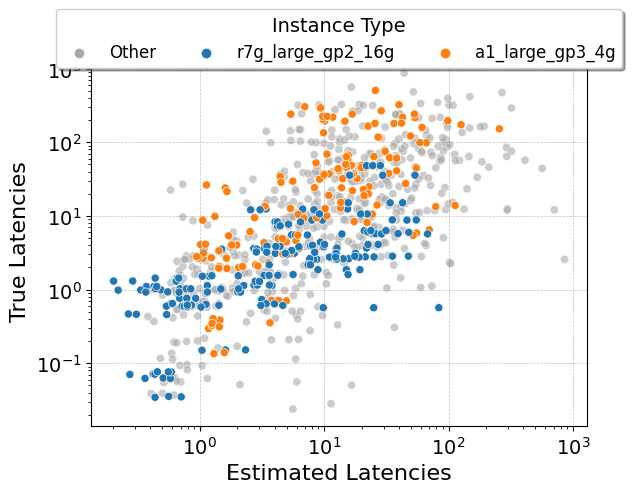

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FuncFormatter

# Function to format the tick labels in absolute terms
def abs_formatter(x, pos):
    return f'{x:g}'

# Assuming FNS, RDIR, and other necessary variables and functions are defined

OUTNAME = RDIR + ".png"
OUTNAME2 = RDIR + "-hue" ".png"

for fn in FNS:
    fn = os.path.join(RDIR, fn)
    df = pd.read_csv(fn)
    print(fn)
    df["Instance Type"] = df.apply(lambda x: get_instance(x), axis=1)

    # Define a custom palette
    custom_palette = {
        'Other': '#a9a9a9',  # Low-key color for "Other"
        "r7g_large_gp2_16g": '#1f77b4',  # Specific color for an instance type
        'a1_large_gp3_4g': '#ff7f0e'     # Specific color for another instance type
    }

    # Separate the DataFrame into groups based on 'Instance Type'
    df_other = df[df['Instance Type'] == 'Other']
    df_not_other = df[df['Instance Type'] != 'Other']

    # Create the scatter plot for 'Other' with lower alpha
    sns.scatterplot(data=df_other, x="Ests", y="True", 
                    hue="Instance Type", palette=custom_palette, 
                    edgecolor='w', s=35, alpha=0.6)

    # Overlay the scatter plot for other labels with full alpha
    sns.scatterplot(data=df_not_other, x="Ests", y="True", 
                    hue="Instance Type", palette=custom_palette, 
                    edgecolor='w', s=35, alpha=1.0)

    # Set the scale to logarithmic
    plt.yscale("log", base=10)
    plt.xscale("log", base=10)

    # Only display major tick labels
    plt.tick_params(axis='both', which='both', labelsize=14)

    # Add titles and labels
    plt.xlabel("Estimated Latencies", fontsize=16)
    plt.ylabel("True Latencies", fontsize=16)

    # Configure the legend
    plt.legend(title='Instance Type', loc='upper center', 
               bbox_to_anchor=(0.5, 1.15), ncol=3,
               fancybox=True, shadow=True, frameon=True, 
               fontsize=12, title_fontsize=14)
    
     # Set the scale to logarithmic
    plt.yscale("log", base=10)
    plt.xscale("log", base=10)

    # Apply the custom formatter for the y-axis
    #plt.gca().yaxis.set_minor_formatter(FuncFormatter(abs_formatter))
    # Apply the custom formatter for the x-axis
    #plt.gca().xaxis.set_minor_formatter(FuncFormatter(abs_formatter))

    # Add grid lines (major grid lines only)
    plt.grid(True, which="major", linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

    # Save and show the plot
    print(OUTNAME2)
    plt.savefig(OUTNAME2, bbox_inches='tight')
    plt.show()


In [82]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ... [your setup code for DataFrame df] ...

# # Define a custom palette
# custom_palette = {
#     'Other': '#a9a9a9',  # Low-key color for "Other"
#     "r7g_large_gp2_16g": '#1f77b4',  # Specific color for an instance type
#     'a1_large_gp3_4g': '#ff7f0e'     # Specific color for another instance type
# }

# # Separate the DataFrame into groups based on 'Instance Type'
# df_other = df[df['Instance Type'] == 'Other']
# df_not_other = df[df['Instance Type'] != 'Other']

# # Create the scatter plot for 'Other' with lower alpha
# sns.scatterplot(data=df_other, x="Ests", y="True", 
#                 hue="Instance Type", palette=custom_palette, 
#                 edgecolor='w', s=35, alpha=0.6)

# # Overlay the scatter plot for other labels with full alpha
# sns.scatterplot(data=df_not_other, x="Ests", y="True", 
#                 hue="Instance Type", palette=custom_palette, 
#                 edgecolor='w', s=35, alpha=1.0)

# # Set the scale to logarithmic
# plt.yscale("log", base=10)
# plt.xscale("log", base=10)

# # Add titles and labels
# plt.xlabel("Estimated Latencies", fontsize=16)
# plt.ylabel("True Latencies", fontsize=16)
# #plt.title("Scatter Plot of Estimated vs True Latencies", fontsize=18)

# # Configure the legend
# plt.legend(title='Instance Type', loc='upper center', 
#            bbox_to_anchor=(0.5, 1.15), ncol=3,
#            fancybox=True, shadow=True, frameon=True, 
#            fontsize=12, title_fontsize=14)

# # Add grid lines (major grid lines only)
# plt.grid(True, which="major", linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# # Save and show the plot
# plt.savefig(OUTNAME2, bbox_inches='tight')
# plt.show()


../estimates/DBMS-All-IMDb-Single/test_unseen-estimates.csv
../estimates/DBMS-All-IMDb-Singlecosts-hue.png


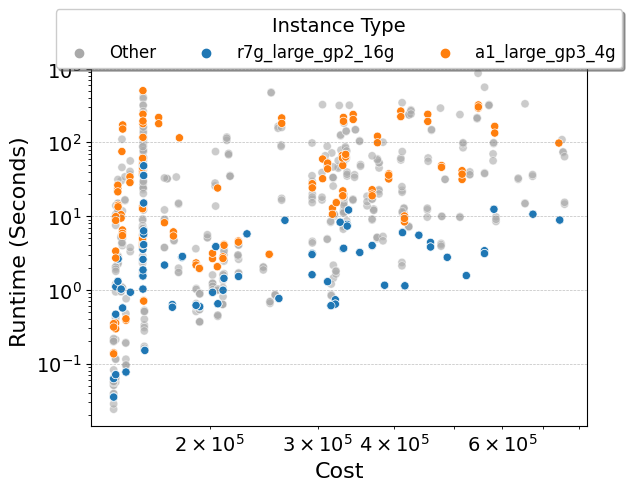

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FuncFormatter

# Function to format the tick labels in absolute terms
def abs_formatter(x, pos):
    return f'{x:g}'

# Assuming FNS, RDIR, and other necessary variables and functions are defined

OUTNAME = RDIR + "-costs.png"
OUTNAME2 = RDIR + "costs-hue.png"

for fn in FNS:
    fn = os.path.join(RDIR, fn)
    df = pd.read_csv(fn)
    print(fn)
    df["Instance Type"] = df.apply(lambda x: get_instance(x), axis=1)
    df["Ests"] = df.apply(lambda x: x["Ests"]*6900 , axis=1)

    # Define a custom palette
    custom_palette = {
        'Other': '#a9a9a9',  # Low-key color for "Other"
        "r7g_large_gp2_16g": '#1f77b4',  # Specific color for an instance type
        'a1_large_gp3_4g': '#ff7f0e'     # Specific color for another instance type
    }

    # Separate the DataFrame into groups based on 'Instance Type'
    df_other = df[df['Instance Type'] == 'Other']
    df_not_other = df[df['Instance Type'] != 'Other']

    # Create the scatter plot for 'Other' with lower alpha
    sns.scatterplot(data=df_other, x="Ests", y="True", 
                    hue="Instance Type", palette=custom_palette, 
                    edgecolor='w', s=35, alpha=0.6)
    
    
    # Overlay the scatter plot for other labels with full alpha
    sns.scatterplot(data=df_not_other, x="Ests", y="True", 
                    hue="Instance Type", palette=custom_palette, 
                    edgecolor='w', s=35, alpha=1.0)

    # Set the scale to logarithmic
    plt.yscale("log", base=10)
    plt.xscale("log", base=10)

    # Only display major tick labels
    plt.tick_params(axis='both', which='both', labelsize=14)

    # Add titles and labels
    plt.xlabel("Cost", fontsize=16)
    plt.ylabel("Runtime (Seconds)", fontsize=16)

    # Configure the legend
    plt.legend(title='Instance Type', loc='upper center', 
               bbox_to_anchor=(0.5, 1.15), ncol=3,
               fancybox=True, shadow=True, frameon=True, 
               fontsize=12, title_fontsize=14)
    
     # Set the scale to logarithmic
    plt.yscale("log", base=10)
    plt.xscale("log", base=10)

    # Apply the custom formatter for the y-axis
    #plt.gca().yaxis.set_minor_formatter(FuncFormatter(abs_formatter))
    # Apply the custom formatter for the x-axis
    #plt.gca().xaxis.set_minor_formatter(FuncFormatter(abs_formatter))

    # Add grid lines (major grid lines only)
    plt.grid(True, which="major", linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

    # Save and show the plot
    print(OUTNAME2)
    plt.savefig(OUTNAME2, bbox_inches='tight')
    plt.show()
